In [11]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

In [12]:
data = load_boston() # house price

X = data.data
y = data.target

In [13]:
X.shape

(506, 13)

In [14]:
y.shape

(506,)

In [15]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [6]:
cv = KFold(n_splits=5, shuffle = True, random_state=42) #5-fold cross-validation

660 0.8046775284172915


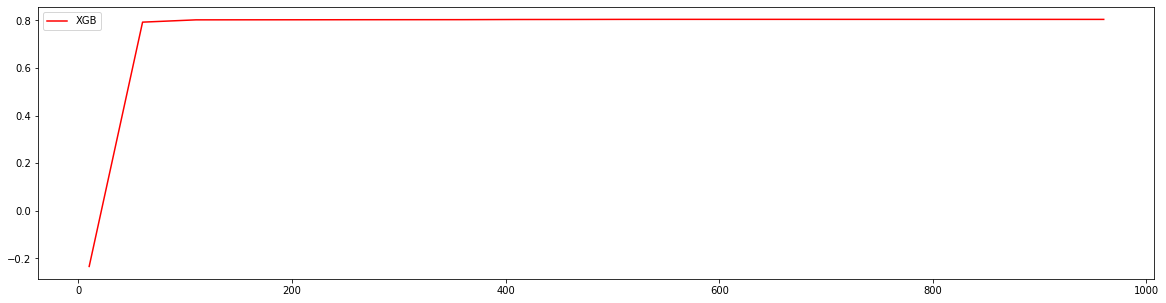

In [7]:
axisx = range(10,1010,50)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420, silent=True)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

In [8]:
def regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2"],show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i] #模型评估指标的名字
                                     ,CVS(reg
                                          ,Xtrain,Ytrain
                                          ,cv=cv,scoring=scoring[i]).mean()))
        score.append(CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean())
    return score

In [9]:
regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"],show=False)

[0.8045157132622822, -13.326379090387746]

In [10]:
from time import time
import datetime

for i in [0,0.2,0.5,1]:
    time0=time()
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=i, silent=True)
    print("learning_rate = {}".format(i))
    regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    print("\t")

learning_rate = 0
r2:-6.76
neg_mean_squared_error:-567.55
00:01:008537
	
learning_rate = 0.2
r2:0.81
neg_mean_squared_error:-13.32
00:01:084865
	
learning_rate = 0.5
r2:0.81
neg_mean_squared_error:-13.24
00:01:093646
	
learning_rate = 1
r2:0.72
neg_mean_squared_error:-19.11
00:01:109553
	
